### Unconstrained sampling with $\mathrm{Normal}(0,1)$ prior:

In [1]:
import matplotlib.pyplot as plt, numpy as np, numpy.random as npr, pystan as ps, matplotlib.pyplot as plt
from tqdm import trange
import scipy
%matplotlib inline
from time import time
from pylab import plot, show, legend

#### Compile Stan model:

In [3]:
sm = ps.StanModel(file="brain_sayan_Gaussian.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7dd29383df470e25f78e4c647a95e4a8 NOW.


#### Load data from file and prepare stan data list:

In [4]:
from numpy import loadtxt

X = np.zeros((42,68,68))
for i in range(42) :
    name = "/home/postdoc/dsen/Desktop/projeted_posterior/brain_data/data_column"+str(i+1)
    X[i] = loadtxt(name, comments="#", delimiter=" ", unpack=False)
X = X.astype(int)

# N = 21 
# m = np.shape(X)[1]
# p = 10
# a = 1/m
# data = dict(N=N, R=m, d=p, X=X[:N], alpha=1/m, lmbda=0.5)

N = 10 
m = 6
p = 3
a = 1/m
data = dict(N=N, p=p, m=m, X=X[:N,:m,:m])

print(np.mean(X[:N,:m,:m]))

0.3888888888888889


#### Sample using stan:

In [5]:
control = dict(max_treedepth=12)
start = time()
fit = sm.sampling(data=data, thin=1, n_jobs=4, chains=4, iter=1_000, init="random", control=control)
print(round((time()-start)/60,2), "minutes to run")
print(fit)
trace = fit.extract()

1.6 minutes to run
Inference for Stan model: anon_model_7dd29383df470e25f78e4c647a95e4a8.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Z[1,1]      8.15    9.93 189.93 -419.0 -26.89   4.89  42.95 421.26    366    1.0
Z[2,1]    -42.93   21.88   72.3 -258.5 -48.91  -17.2  -6.37   0.67     11   1.24
Z[3,1]    139.68   99.33 228.46   6.68  27.92  61.86 116.67 887.32      5   1.57
Z[4,1]      24.6   12.61  52.57 -16.49   1.86    9.3  25.12 189.99     17   1.19
Z[5,1]     55.01   34.34 105.83  -1.11   7.68  22.46  49.66  382.4      9   1.31
Z[6,1]     -77.6   49.26 129.93 -530.5 -74.69 -28.39 -12.49  -2.39      7   1.43
Z[1,2]    -23.64   17.51 229.07 -734.6 -39.66  -3.09  26.33 322.38    171   1.03
Z[2,2]      10.5   22.42 225.75 -318.9 -40.28  -2.89  23.39 465.29    101   1.06
Z[3,2]     127.1   78.22  197.1   5.84  24.27   53.6 142.33  799.

#### Plot posterior samples of $Z + U^T \Lambda U$:

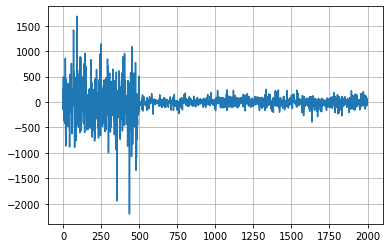

In [10]:
n = 0

Nsamples = np.shape(trace['U'])[0]
ZUDU = np.zeros((Nsamples, m, m))
for idx in range(Nsamples) :
    ZUDU[idx] = np.matmul(np.matmul(trace['U'][idx], np.diag(trace['D'][idx,n])), trace['U'][idx].transpose())
ZUDU += trace['Z']

i, j = 3, 3
plt.plot(ZUDU[:,i,j])
plt.grid(True)